# Introduction to Data Science – Homework 7
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, March 6, 11:59pm.

In this homework, you will use classification methods to classify handwritten digits (Part 1) and predict the popularity of online news (Part 2). We hope these exercises will give you an idea of the broad usage of classification methods. 

## Your Data
First Name: Patricia
<br>
Last Name: Girardi
<br>
E-mail: patricia.girardi@utah.edu
<br>
UID: u0894934
<br>

In [1]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part1: MNIST handwritten digits

The MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. You will see that images are just matrices with scalar values, and that we can apply the classification algorithms we studied on them.

Because both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various classification methods. For example, [this webpage](http://yann.lecun.com/exdb/mnist/) gives a comparison of a variety of different classification methods on MNIST (Note that the tests on this website are for higher resolution images than we'll use.) 

In this problem, we'll use scikit-learn to compare classification methods on the MNIST dataset. 

There are several versions of the MNIST dataset. We'll use the one that is built-into scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10 (one for each digit)
* Samples total: 1797
* Samples per class: $\approx$180
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16 (grayscale value; 0 is white, 16 is black)

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

Note that we will scale the data before running them through our algorithms. You can read details about scaling and why it's important [here](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

In [2]:
digits = load_digits()
X = digits.data
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))


<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


In [3]:
# this is what one digit (a zero) looks like

print("===\nThe digit")
print(digits.target[0])

print("===\nThe raw data")
print(digits.images[0])

print("===\nThe scaled data")
print(X[0])

===
The digit
0
===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.757435

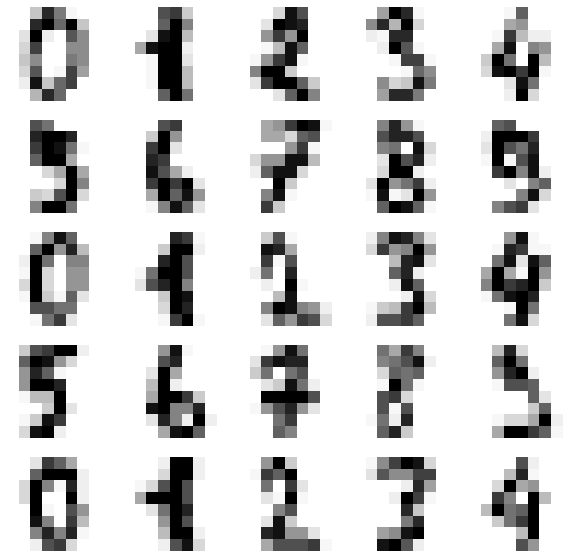

In [4]:
# plot a few of the images

plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(digits.images[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

You might find [this webpage](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) to be generally helpful for this exercise. 

### Task 1.1: Classification with Support Vector Machines (SVM)

1. Split the data into a training and test set using the command 
```
train_test_split(X, y, random_state=1, test_size=0.8)
```
+ Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.
+ Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? 
+ Print all of these misclassified digits as images. 
+ Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 500. What is the best value? 
+ Try to train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?

Score is: 0.9534075104311543

Confusion matrix, without normalization
[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 139   0   0  13   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   3   1   1   0   0   0   1 127   0]
 [  0   2   0   2   0   2   1   2   2 141]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.93959732 0.02684564 0.         0.         0.
  0.         0.00671141 0.02684564 0.        ]
 [0.         0.00704225 0.94366197 0.         0.         0.
  0.         0.01408451 0.03521127 0.        ]
 [0.         0.         0.02040816 0.92517007 0.         0.
  0.         0.02040816 0.02721088 0.00680272]
 [0.         0.         0.         0.      

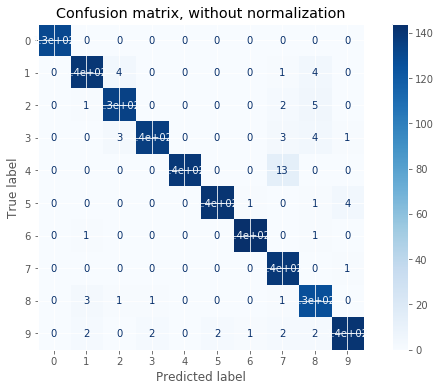

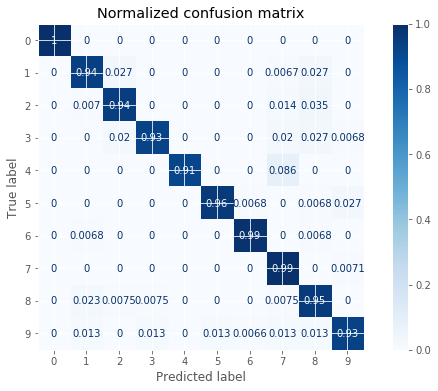

In [5]:
from sklearn.metrics import plot_confusion_matrix

# your solution goes here
# 1.1.1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)

# 1.1.2
h1 = svm.SVC(kernel='rbf', gamma='scale', C=100)
h1.fit(X_train,y_train) 

# 1.1.3
print("Score is: " + str(h1.score(X_test,y_test)))
print()
titles_options = [("Confusion matrix, without normalization", None),
                ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(h1, X_test, y_test,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

**Your Interpretation**: Looks like 4 is often misclassified as 7.  It also seems to get 8 and 2 confused a bit.

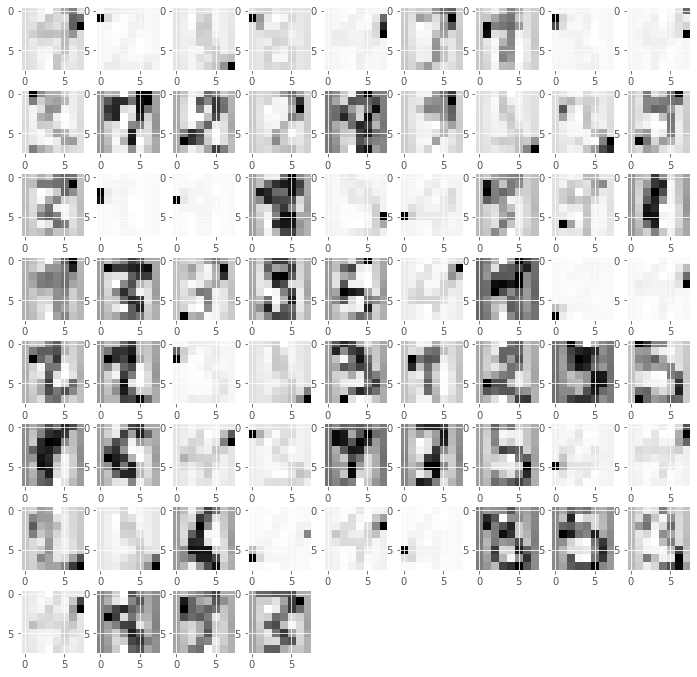

In [6]:
# task 1.1.4

y_test = np.asarray(y_test)
misclassified = np.where(y_test != h1.predict(X_test))

misclassified_list=[]
for i in misclassified:
    for x in i:
        misclassified_list.append(x)

plt.figure(figsize= (12,12))    
for plotIndex, badIndex in enumerate(misclassified_list):
    plt.subplot(8,9, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (8,8)), cmap='Greys')

**Interpretation**: Wow, I can't even tell what half of these are, so I'm not mad my program couldn't figure it out. There do seem to be a lot of 4's here, which makes sense because those were showing a lot on the confusion matrix. 

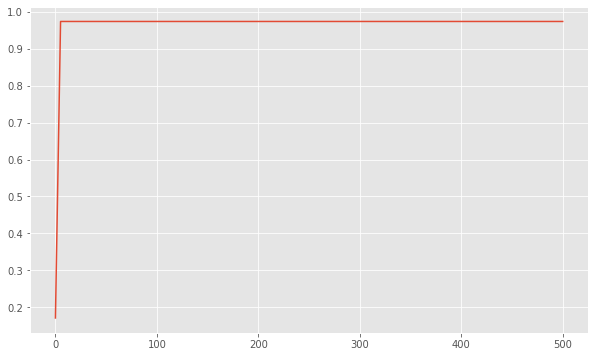

In [7]:
# Task 1.1.5
Cs = np.linspace(0.01,500,100)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs):
    h1 = svm.SVC(kernel='rbf', C = C, gamma='scale')
    scores = cross_val_score(estimator = h1, X = digits.data, y = digits.target, cv=5, scoring='accuracy')    
    Accuracies[i] = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.show()

In [8]:
print(Cs[0:5])
print(Accuracies[0:5])

[1.00000000e-02 5.06040404e+00 1.01108081e+01 1.51612121e+01
 2.02116162e+01]
[0.17090529 0.9738502  0.9738502  0.9738502  0.9738502 ]


**Interpretation**: According to the graph, looks like ~5.06 is the best C value-- C=0.01 had a really low accuracy, and after that, it stayed pretty much constant for the other C values. 5 is the lowest C with that high accuracy.

In [9]:
# Task 1.1.6

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)

h1 = svm.SVC(kernel='rbf', gamma='scale', C=100)
h1.fit(X_train,y_train) 

print("Score is: " + str(h1.score(X_test,y_test)))

Score is: 0.9756606397774688


Accuracy is slightly better for unscaled data (97.6% vs 95.3%), which is odd... Perhaps stochastic variation in the test/train data? I don't really know why--scaling should help it. Maybe some of the scaled images were lightened too much and the digits weren't visible anymore.

I actually tried running this on scaled/unscaled and printed out the unscaled mismatches...the images are a LOT cleaner without scaling??? That's so strange.

### Task 1.2: Prediction with k-nearest neighbors
Repeat task 1.1 using k-nearest neighbors (k-NN). In part 2, use k=10. In part 5, find the best value of k. 

Score is: 0.9123783031988874

Confusion matrix, without normalization
[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.91946309 0.0738255  0.         0.         0.
  0.         0.         0.00671141 0.        ]
 [0.01408451 0.02816901 0.86619718 0.01408451 0.         0.
  0.         0.01408451 0.06338028 0.        ]
 [0.00680272 0.         0.00680272 0.9047619  0.         0.00680272
  0.         0.04081633 0.02721088 0.00680272]
 [0.         0.         0.         

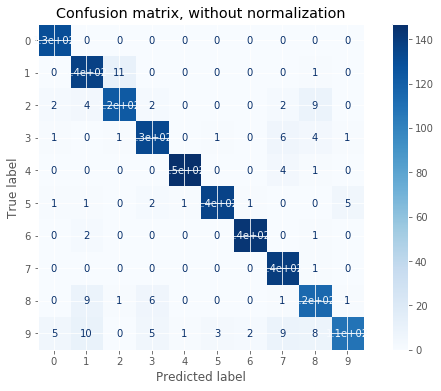

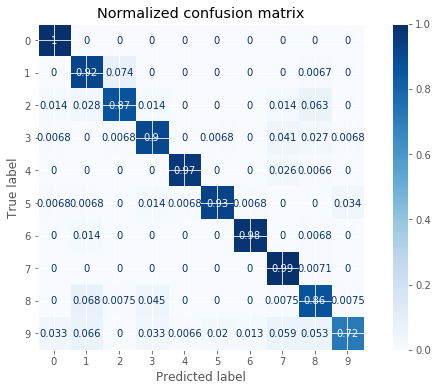

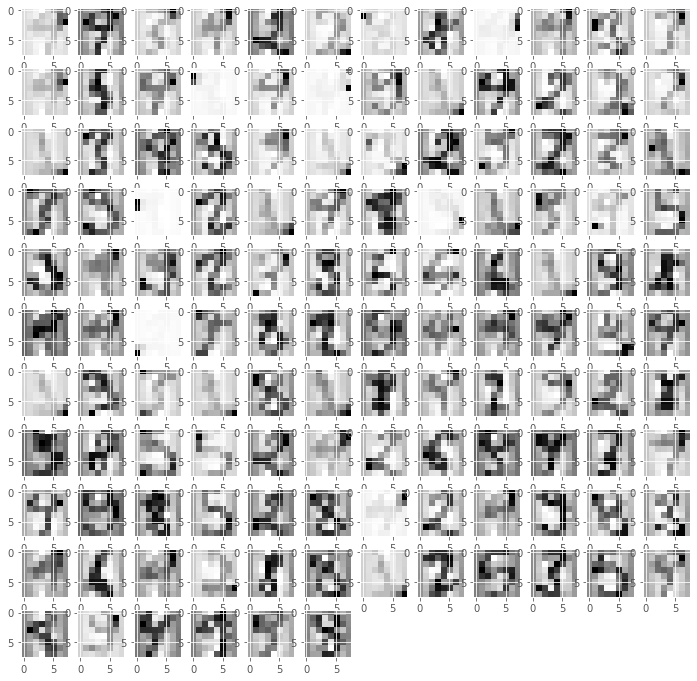

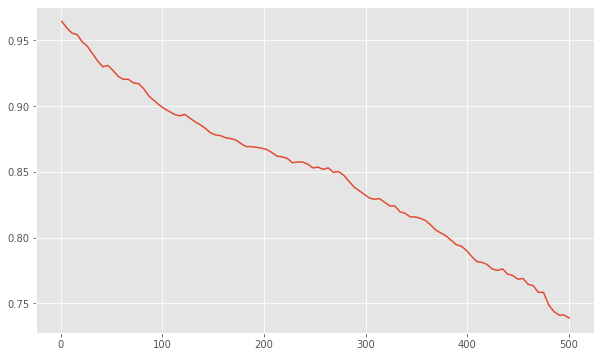

In [10]:
# reloading scaled data

digits = load_digits()
X = digits.data
X = scale(digits.data)
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)

# Task 1.2.2
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(X_train,y_train) 

# Task 1.2.3
print("Score is: " + str(knn_model.score(X_test,y_test)))
print()
titles_options = [("Confusion matrix, without normalization", None),
                ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn_model, X_test, y_test,
                                cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

# Task 1.2.4
y_test = np.asarray(y_test)
misclassified = np.where(y_test != knn_model.predict(X_test))

misclassified_list=[]
for i in misclassified:
    for x in i:
        misclassified_list.append(x)
        
plt.figure(figsize= (12,12))    
for plotIndex, badIndex in enumerate(misclassified_list):
    plt.subplot(11,12, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (8,8)), cmap='Greys')
plt.show()

# Task 1.2.5
knn_model.get_params()

Ks = np.linspace(1,500,100)
Accuracies = np.zeros(Ks.shape[0])
for i,K in enumerate(Ks): 
    knn_model = KNeighborsClassifier(n_neighbors = int(K))
    scores = cross_val_score(estimator = knn_model, X = digits.data, y = digits.target, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Ks,Accuracies)
plt.show()

In [11]:
Accuracies[0:5]

array([0.96439338, 0.95938564, 0.9554983 , 0.95438409, 0.94881925])

**Your Interpretation**: Looks like 9's are the problem child for my KNN classifier. Overall, those are not being classified very well (confused for 1,7,8). 1's and 2's are getting mixed up fairly frequently as well.
And apparently n_neighbors = 1 is the highest accuracy (0.9643)? That's confusing...

In [12]:
# Task 1.2.6

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)

knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(X_train,y_train) 
print("Score is: " + str(knn_model.score(X_test,y_test)))

Score is: 0.9388038942976356


And now the accuracies are the same. That's interesting but I think scaling would affect KNN less, I guess, since scaling them should just standardize all of them. But as a I mentioned above, I think the scaling is actually having an unintended effect on the images because some of them are coming out TERRIBLE compared to the unscaled images.

# Part 2: Popularity of online news

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. You can learn details about the datasetat the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and Januyary 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


### Task 2.1 Import the data 
* Use the pandas.read_csv() function to import the dataset.
* To us[scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.values* command to export the predictor variables as a numpy array called *X* this array should not include our target variable (the number of shares). We don't need the url and timedelta, so let's drop these columns. 
* Export the number of shares as a separate numpy array, called *shares*. We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, *y*, which indicates whether or not each article is popular.

In [13]:
# import data & drop unneeded columns
data = pd.read_csv('OnlineNewsPopularity.csv')
data = data.drop(columns=["url", " timedelta"])

# separate features from target & create array
features = data.drop(columns=[" shares"])
X = features.values

# median value of shares is 1400
# convert to binary array where =<1400 is 0 (not popular)
data[' shares'] = np.where(data[' shares'].between(0,1400), 0, data[' shares'])
data[' shares'] = np.where(data[' shares'].between(1401,843300), 1, data[' shares'])
shares = data[" shares"].values

### Task 2.2 Exploratory data analysis 

First check to see if the values are reasonable. What are the min, median, and maximum number of shares? 

In [14]:
data = pd.read_csv('OnlineNewsPopularity.csv')
data = data.drop(columns=["url", " timedelta"])

data[" shares"].describe()

# that's a lot of shares!

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

### Task 2.3 Classification using k-NN

Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, shares, random_state=1, test_size=0.8)
small_x = X[0:5000]
small_y = shares[0:5000]

Ks = np.linspace(1,20,20)
Accuracies = np.zeros(Ks.shape[0])
for i,K in enumerate(Ks): 
    knn_model = KNeighborsClassifier(n_neighbors = int(K))
    scores = cross_val_score(estimator = knn_model, X = small_x, y = small_y, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()

In [16]:
# 3 neighbers seems to yield best results
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train,y_train) 
print("Score is: " + str(knn_model.score(X_test,y_test)))

Score is: 0.5447723546474965


**Interpretation:** Wow KNN is terrible on this data. You're almost better off just flipping a coin. 

### Task 2.4 Classification using SVM

Develop a support vector machine classification model for the data.

*Hint:* SVM is more computationally expensive, so you might want to start by using only a fraction of the data, say 5,000 articles. It takes multiple minutes to run on the whole dataset.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, shares, random_state=1, test_size=0.8)
small_x = X[0:5000]
small_y = shares[0:5000]

Cs = np.linspace(1,20,20)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs): 
    h1 = svm.SVC(kernel='rbf', C = C, gamma='scale')
    scores = cross_val_score(estimator = h1, X = small_x, y = small_y, cv=5, scoring='accuracy')    
    Accuracies[i] = scores.mean()

In [18]:
print(Accuracies[0:5])

[0.5518 0.554  0.558  0.5472 0.536 ]


In [19]:
# again 3 is the magic number. Let's see how the classifier performs overall.
h1 = svm.SVC(kernel='rbf', gamma='scale', C=3)
h1.fit(X_train,y_train) 
print("Score is: " + str(h1.score(X_test,y_test)))

Score is: 0.5482406356413166


Again, flipping a coin is a reasonable alternative. SVM is 0.4% more accurate than KNN.

### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data. Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 

In [20]:
data

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [21]:
from scipy import misc
import math
    
X_train, X_test, y_train, y_test = train_test_split(X, shares, random_state=1, test_size=0.8)
small_x = X[0:5000]
small_y = shares[0:5000]

max_depth = np.linspace(1,20,20)
Accuracies = np.zeros(max_depth.shape[0])
for i,depth in enumerate(max_depth): 
    decisionTree = tree.DecisionTreeClassifier(max_depth = depth)
    scores = cross_val_score(estimator = decisionTree, X = small_x, y = small_y, cv=5, scoring='accuracy')    
    Accuracies[i] = scores.mean()
print(Accuracies)
print(max_depth)

min_samples_split = np.linspace(0.01,1,10)
Accuracies = np.zeros(min_samples_split.shape[0])
for i,split in enumerate(min_samples_split): 
    decisionTree = tree.DecisionTreeClassifier(min_samples_split = split)
    scores = cross_val_score(estimator = decisionTree, X = small_x, y = small_y, cv=5, scoring='accuracy')    
    Accuracies[i] = scores.mean()
print(Accuracies)
print(min_samples_split)

[0.5618 0.555  0.5744 0.5682 0.5796 0.5766 0.5726 0.5726 0.5738 0.5658
 0.5586 0.5502 0.5492 0.5486 0.5402 0.5458 0.5374 0.545  0.543  0.545 ]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]
[0.5424 0.5854 0.5894 0.5874 0.5876 0.5748 0.5598 0.555  0.5618 0.5618]
[0.01 0.12 0.23 0.34 0.45 0.56 0.67 0.78 0.89 1.  ]


In [22]:
decisionTree = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=0.23)

decisionTree = decisionTree.fit(X_train, y_train)

y_pred_train = decisionTree.predict(X_train)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))

y_pred = decisionTree.predict(X_test)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on training data=  0.6270181634712412
Accuracy on test data=  0.6191827468785471


### Task 2.6 Describe your findings
1. Which method (k-NN, SVM, Decision Tree) worked best?
+ How did different parameters influence the accuracy?
+  Which model is easiest do interpret?
+ How would you interpret your results?


**Your Solution:**
1. Definitely DecisionTree
+ The max_depth and min_samples_split affected accuracy by as much as 4-5% in some cases (with cross-validation) so I feel pretty confident that the change isn't just due to chance. 5% is actually a lot in machine learning, I've found. 62% accuracy is low but nothing to sneeze at. 
+ KNN was definitely easiest for me to code and easiest for me to wrap my head around from JUST the code. DecisionTree makes more sense to me when represented in a graph.
+ So as I said 62% isn't amazing, but it's still a marked improvement from just randomly assigning popular/not popular. There are some interesting sklearn functions that can help you choose features that are most likely to influence the target, so I'd like to try selecting 3-4 features that are really important and maybe see how the classifier performs on just those.